In [1]:
import json
import pandas as pd
df = pd.read_json('Musical_Instruments_5.json',lines = True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
helpful - helpfulness rating of the review, e.g. 2/3
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [3]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall,10261.0,4.488744e+00,8.946424e-01,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,10261.0,1.360606e+09,3.779735e+07,1.095466e+09,1.343434e+09,1.368490e+09,1.388966e+09,1.405987e+09


In [5]:
print("\n\n\nMissing Values:\n",df.isna().sum())




Missing Values:
 reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


In [6]:
#Total number of products
df.asin.nunique()

900

In [7]:
#Total number of unique users
df.reviewerID.nunique()

1429

a. Counts, averages

In [8]:
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [9]:
df.mean()

C:\Users\romer\AppData\Local\Temp/ipykernel_12368/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


overall           4.488744e+00
unixReviewTime    1.360606e+09
dtype: float64

b. Distribution of the number of reviews across products

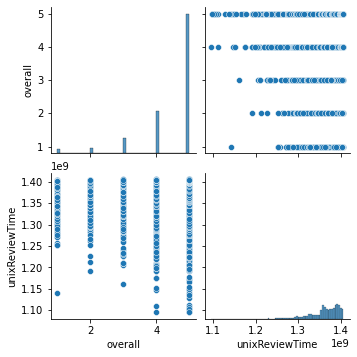

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

In [11]:
ratings= df['overall'].value_counts().keys().tolist()
values = df['overall'].value_counts().tolist()

In [12]:
print(f'Rating   Distribution')
for i in range(len(ratings)):
    print(f'{ratings[i]}      {values[i]}')

Rating   Distribution
5      6938
4      2084
3      772
2      250
1      217


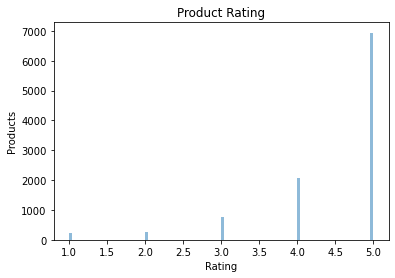

In [13]:
num_bin=100
plt.hist(df['overall'],num_bin,alpha=0.5)
plt.title('Product Rating')
plt.xlabel("Rating")
plt.ylabel("Products")
plt.show()

c. Distribution of the number of reviews per product

In [14]:
products= df['asin'].value_counts().keys().tolist()
reviewsPerProducts = df['asin'].value_counts().tolist()

In [15]:
print(f'Products   Reviews count')
for i in range(len(products)):
    print(f'{products[i]}      {reviewsPerProducts[i]}')

Products   Reviews count
B003VWJ2K8      163
B0002E1G5C      143
B0002F7K7Y      116
B003VWKPHC      114
B0002H0A3S      93
B0002CZVXM      74
B0006NDF8A      71
B0009G1E0K      69
B0002E2KPC      68
B0002GLDQM      67
B004XNK7AI      65
B005FKF1PY      63
B00646MZHK      62
B001PGXHX0      58
B0002GMGYA      58
B000978D58      57
B0018TIADQ      57
B0002D0CEO      55
B001PGXKC8      55
B000068NW5      52
B0002IHFVM      49
B000RNB720      47
B0002OOMU8      46
B0002M6CVC      46
B0002CZW0Y      46
B0002E2XCW      45
B000PO30QM      44
B0002E3CHC      44
B005CX4GLE      42
B0002D0E8S      41
B000L6GD04      37
B0002GLCRC      37
B008BPI2HE      35
B0002GYW4C      35
B0002GZM00      34
B000EELB8W      33
B0002GXF8Q      33
B0002GWFEQ      33
B003JJQMD8      32
B003DVGVIS      32
B0002E1O2C      32
B0026RB0G8      31
B000NJ2TIE      30
B000VJJQUU      29
B0002D0CQC      29
B0002DV7ZM      29
B000B6FBA2      28
B0002CZSJO      28
B0042EZH6W      27
B004Z17008      27
B0015RIN6U      27
B0

In [16]:
highestRatedProduct=df.loc[df['asin'] == "B003VWJ2K8"]
highestRatedProduct["overall"].value_counts()

5    134
4     18
3      5
1      5
2      1
Name: overall, dtype: int64

In [17]:
lowestRatedProduct=df.loc[df['asin'] == "B004HJ9COU"]
lowestRatedProduct["overall"].value_counts()

5    3
1    1
3    1
Name: overall, dtype: int64

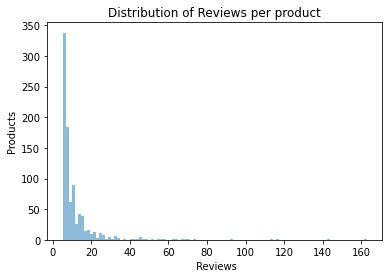

In [18]:
plt.hist(df['asin'].value_counts(),num_bin,alpha=0.5)
plt.xlabel(' Reviews')
plt.ylabel('Products')
plt.title('Distribution of Reviews per product')
plt.show()

In [19]:
user= df['reviewerID'].value_counts().keys().tolist()
reviewsPerUser = df['reviewerID'].value_counts().tolist()

In [20]:
print(f'Users:Reviews count')
for i in range(len(user)):
    print(f'{user[i]}:{reviewsPerUser[i]}')

Users:Reviews count
ADH0O8UVJOT10:42
A15TYOEWBQYF0X:38
A1L7M2JXN4EZCR:38
A2EZWZ8MBEDOLN:36
A2NYK9KWFMJV4Y:34
A1SD1C8XK3Z3V1:32
A1MVH1WLYDHZ49:32
A1GMWTGXW682GB:29
A34O0KQV4QXWNQ:28
A1LQC225SE8UNI:27
AJK15Q9JOEHRH:25
A22Z554ZQ8NFPC:25
A1DVUFG2QSJ6IK:24
A3M1PLEYNDEYO8:24
A2F92AOWTIUIB:23
AKYDGCKCY7H9F:23
A781ITP3HE2N5:22
A1EVEQAR05SY7L:21
A3ITN3125FJETP:21
A3UXW18DP4WSD6:21
A1YP96MT6W9FTB:21
A26SN2CVQM4FKM:21
A6FIAB28IS79:21
A2F2L5F9OWWVY6:20
A3OXHLG6DIBRW8:20
A31B0LYT2C92SN:20
A2053ZJUGCKUA5:20
A37A41GWQFMK3D:20
A319B090A2POEB:20
A2CJVLER896Q7L:19
A1CL807EOUPVP1:19
A1NAA1R38JSNHV:19
A1YR3RVSBZK8CW:19
ALHC64J88LVWO:19
A2RVY2GDMZHH4:18
A4BTCECGQAIUI:18
A1EUO0BU72JR7T:18
ATJQOAUHB5XB8:17
AKHWZ3S1UVZAO:17
A3CSSZ6U5J4YS5:17
A23AKO4BZLZ8DE:17
A1MAQQXJZTMSKT:17
A3AOPVQ7EZHTWA:17
A306YUQBEB2R9T:16
A2D0F87RY5YMHN:16
A2Y8JW5NSY95OL:16
A1RPTVW5VEOSI:16
A2SBZZ1HSR7WSP:16
A3HKZSCGFU9T2A:16
A1C0O09LOLVI39:15
A3RDS0DJ5EJGA7:15
A3EXWV8FNSSFL6:15
AMP0Z3DR4RCH7:15
A2A039TZMZHH9Y:15
AR6CAR106LX2Y:15
A20TF

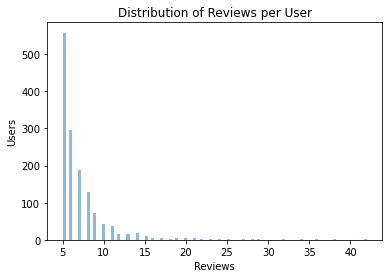

In [21]:
plt.hist(df['reviewerID'].value_counts(),num_bin,alpha=0.5)
plt.xlabel('Reviews')
plt.ylabel('Users')
plt.title('Distribution of Reviews per User')
plt.show()

# 2. Text basic pre-processing:

In [22]:
#Stratified sampling
random_sample = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(200))


In [23]:
random_sample['overall'].value_counts()

1    200
2    200
3    200
4    200
5    200
Name: overall, dtype: int64

In [24]:
def product_ratings(x):
    if x['overall'] == 5 or x['overall'] == 4:
        x['ratings'] = 'Positive'
    elif x['overall'] == 3:
        x['ratings'] = 'Neutral'
    elif x['overall'] == 2 or x['overall'] == 1:
        x['ratings'] = 'Negative'
    return x

In [25]:
random_sample = random_sample.apply(product_ratings, axis = 1)


In [26]:
random_sample['ratings'].value_counts()

Negative    400
Positive    400
Neutral     200
Name: ratings, dtype: int64

In [27]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 7322 to 2091
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      1000 non-null   object
 1   asin            1000 non-null   object
 2   reviewerName    998 non-null    object
 3   helpful         1000 non-null   object
 4   reviewText      1000 non-null   object
 5   overall         1000 non-null   int64 
 6   summary         1000 non-null   object
 7   unixReviewTime  1000 non-null   int64 
 8   reviewTime      1000 non-null   object
 9   ratings         1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 85.9+ KB


In [28]:
random_sample.drop(['reviewerName','helpful','unixReviewTime','reviewTime'], axis=1, inplace= True)

In [29]:
random_sample.columns

Index(['reviewerID', 'asin', 'reviewText', 'overall', 'summary', 'ratings'], dtype='object')

## Data Cleanup

In [30]:
'''Lowercasing'''

#random_sample['reviewText1'] = random_sample['reviewText'].apply(lambda x: ["".join(i.lower()) for i in x.split(' ')])

random_sample['reviewText'] = random_sample['reviewText'].str.lower()

In [31]:
random_sample.head(500)

,reviewerID,asin,reviewText,overall,summary,ratings
7322,A2X2GEABQXRX7P,B002HPMTZU,unless you tune to only standard tunings this ...,1,Useless for drop tuning!,Negative
9635,ASSWUAOO49Z8Q,B007IE5QP0,kripes man..the one time i go and actually buy...,1,Straight up Terr-Ash!,Negative
9286,A20SQURQ3G1BGY,B005M0CK9M,50+ years playingmy pedal is unuseablethe lowe...,1,mine is unuseable,Negative
2556,A1MI9FDCNB3CMR,B0002GXF8Q,"okay, color coding is a great idea.divas will...",1,Color Coding Helps the sound engineer,Negative
7165,A118PM0B1PGWDA,B0027V760M,it stopped working after 2 gigs. i'm not sure ...,1,Stopped working after 2 gigs,Negative
...,...,...,...,...,...,...
2322,AG3PVU7DCXZTK,B0002GLDQM,"i own three of these, and have them attached t...",3,"5 stars for normal size picks, but 1 star for ...",Neutral
9995,A2TBAUW2W7J538,B00AQBT3EW,d'addario strings are like the kias of the str...,3,OK but...still D'Addarios,Neutral
4220,A94QU4C90B1AX,B000B6DHB2,don't get me wrong...this is a great little am...,3,Stock up on batteries!,Neutral
5306,ADH0O8UVJOT10,B000PAPO9W,the behringer ucg102 device is an aging (yet a...,3,Functional device; problematic software & drivers,Neutral


In [32]:
'''Remove puncutations'''

random_sample['reviewText'] = random_sample['reviewText'].str.replace('[^\w\s]','', regex=True)

In [33]:
random_sample.head(10)

,reviewerID,asin,reviewText,overall,summary,ratings
7322,A2X2GEABQXRX7P,B002HPMTZU,unless you tune to only standard tunings this ...,1,Useless for drop tuning!,Negative
9635,ASSWUAOO49Z8Q,B007IE5QP0,kripes manthe one time i go and actually buy a...,1,Straight up Terr-Ash!,Negative
9286,A20SQURQ3G1BGY,B005M0CK9M,50 years playingmy pedal is unuseablethe lower...,1,mine is unuseable,Negative
2556,A1MI9FDCNB3CMR,B0002GXF8Q,okay color coding is a great ideadivas will n...,1,Color Coding Helps the sound engineer,Negative
7165,A118PM0B1PGWDA,B0027V760M,it stopped working after 2 gigs im not sure wh...,1,Stopped working after 2 gigs,Negative
3793,A1BNFL98NKJNYA,B0007L8BQW,arrive in trashed packing but the worst was th...,1,No good,Negative
4910,A118PM0B1PGWDA,B000KIPUQG,its a decent unit but stopped working complete...,1,Stopped working after about 6 months.,Negative
993,A91PW87FR65XH,B0002D0CQC,this product is not what it seems it has a coo...,1,Not For Serious Players,Negative
7850,A3K9OQPCI8UJE,B003BFYDBS,one of the ball bearings designed to catch and...,1,Faulty Product,Negative
4678,A306YUQBEB2R9T,B000EELBQ4,this strap is uncomfortable and too flimsy to ...,1,Didn't like this particular strap,Negative


In [34]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 50)

random_sample[['reviewText']].head(10)

C:\Users\romer\AppData\Local\Temp/ipykernel_12368/19445578.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,reviewText
7322,unless you tune to only standard tunings this thing is garbage i tune my hellraiser to d then drop to c and it will not register the needle either flops around constantly or just does not display the proper notes
9635,kripes manthe one time i go and actually buy a honer and its a bummer this thing has 3 keys off tune i can buy stuff 10 times better quality from chinaand never have this kinda junk maybe its a fluke because everyone else gave it a thumbs up and i m really not the type a guy to go running stuff down butmaaan ive never got a harp this trashy b4 all i can say is buy meranas for tryin out buy suzuki or swan from ebayoverseas if yer a poor guy like meand youll be better off oh btw hottip for poor guys again you can get a mississipi river harp for only 5oo if you have a burkes outlet near youtheyre up by the counter and as good as the high dollar one made by unowho the doctah has spoken
9286,50 years playingmy pedal is unuseablethe lower strings are all mush at any gain or eq settingread all the good reviews and watched all the videosmine sounds nothing like themmaybe defectivei also own the joyo british and joyo crunch and they are flawless
2556,okay color coding is a great ideadivas will not use the red ball windscreenwhybecause from a distance it looks like they have a clown noseno kidding i have had several tell this to me and my sound tech so save your dough buy any color but reddivas what can i say
7165,it stopped working after 2 gigs im not sure why but it is very frustrating i guess you get what you pay for here
3793,arrive in trashed packing but the worst was that it sounded like a piece of chalk on a blackboard certainly not professional quality or any quality that i would give it
4910,its a decent unit but stopped working completely after about 6 months tried everything i could but its gone i would not recommend this pedal
993,this product is not what it seems it has a cool name but thats about it its a tool oil that stinks i tried my best to get use to this product but learned that there are much better ways after going into the studio and recording for the 1st time after doing away with the fastfret my playing has improved and i hardly ever have to change my string because of gook not to mention that getting that crap on my fingers was just nasty i now use old english and my guitars thank me my nose thanks me and my fingers thank me you will too
7850,one of the ball bearings designed to catch and lock the side mounted to the strap dislodged and my very expensive fender custom shop telecaster fell flat on the ground
4678,this strap is uncomfortable and too flimsy to feel good also doesnt fit an instrument where theres no place to hook it i returned mine as it just didnt fit well for my uke or mandolin


In [35]:
'''Lemmitization'''

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [36]:
random_sample['reviewText'] = random_sample['reviewText'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [37]:
random_sample.head(5)

,reviewerID,asin,reviewText,overall,summary,ratings
7322,A2X2GEABQXRX7P,B002HPMTZU,unless you tune to only standard tuning this thing is garbage i tune my hellraiser to d then drop to c and it will not register the needle either flop around constantly or just doe not display the proper note,1,Useless for drop tuning!,Negative
9635,ASSWUAOO49Z8Q,B007IE5QP0,kripes manthe one time i go and actually buy a honer and it a bummer this thing ha 3 key off tune i can buy stuff 10 time better quality from chinaand never have this kinda junk maybe it a fluke because everyone else gave it a thumb up and i m really not the type a guy to go running stuff down butmaaan ive never got a harp this trashy b4 all i can say is buy meranas for tryin out buy suzuki or swan from ebayoverseas if yer a poor guy like meand youll be better off oh btw hottip for poor guy again you can get a mississipi river harp for only 5oo if you have a burke outlet near youtheyre up by the counter and a good a the high dollar one made by unowho the doctah ha spoken,1,Straight up Terr-Ash!,Negative
9286,A20SQURQ3G1BGY,B005M0CK9M,50 year playingmy pedal is unuseablethe lower string are all mush at any gain or eq settingread all the good review and watched all the videosmine sound nothing like themmaybe defectivei also own the joyo british and joyo crunch and they are flawless,1,mine is unuseable,Negative
2556,A1MI9FDCNB3CMR,B0002GXF8Q,okay color coding is a great ideadivas will not use the red ball windscreenwhybecause from a distance it look like they have a clown noseno kidding i have had several tell this to me and my sound tech so save your dough buy any color but reddivas what can i say,1,Color Coding Helps the sound engineer,Negative
7165,A118PM0B1PGWDA,B0027V760M,it stopped working after 2 gig im not sure why but it is very frustrating i guess you get what you pay for here,1,Stopped working after 2 gigs,Negative


In [38]:
duplicate_random_sample = random_sample.copy()
y = random_sample.pop('ratings').to_frame()
X = random_sample.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.3)

In [39]:
y_train['ratings'].value_counts()

Positive    280
Negative    280
Neutral     140
Name: ratings, dtype: int64

In [40]:
y_test['ratings'].value_counts()

Negative    120
Positive    120
Neutral     60 
Name: ratings, dtype: int64

In [41]:
duplicate_random_sample['ratings'].value_counts()

Negative    400
Positive    400
Neutral     200
Name: ratings, dtype: int64